# Lead Scoring Assignmnet

## Reading and Understanding Data

In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import statistics

In [114]:
# Import the csv file.
lead_score_org = pd.read_csv('Leads.csv')
lead_score_org.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [115]:
#Check structure of data
lead_score_org.shape

(9240, 37)

In [116]:
#Check structure of data
lead_score_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [117]:
# Check data quality
lead_score_org.describe(percentiles = [.25, .50, .75, .90, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000,16.000000,19.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000,17.000000,20.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Data Cleaning and Visualisation

In [118]:
# Treat each 'Select' as NaN
lead_score_ver1 = lead_score_org.replace('Select', np.nan)
lead_score_ver1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [119]:
# Remove rows with more than 30% missing value
lead_score_ver1 = lead_score_ver1[(round(100 * lead_score_ver1.isnull().sum(axis = 1) / len(lead_score_ver1.columns), 2) < 30)]
lead_score_ver1.shape

(8568, 37)

In [120]:
# Keep columns with 70% non NA value
thres = int(0.70 * len(lead_score_ver1))
lead_score_ver1.dropna(axis = 1, thresh = thres, inplace = True)
lead_score_ver1.shape

(8568, 27)

#### Analysis each column

In [121]:
# Remove 'Prospect ID' and 'Lead Number' as they are unique and are only to identify the rows.
lead_score_ver1.drop('Prospect ID', axis = 1, inplace = True)
lead_score_ver1.set_index('Lead Number', inplace = True)
lead_score_ver1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [122]:
def replace_low_freq(df, threshold=2, replacement='Others'):
    s = df.stack()
    c = s.value_counts()
    m = pd.Series(replacement, c.index[c <= threshold])
    return s.replace(m).unstack()


In [123]:
# Check 'Lead Origin' for nan values
lead_score_ver1['Lead Origin'].value_counts(dropna = False)


Landing Page Submission    4869
API                        2951
Lead Add Form               692
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [124]:
#Check 'Lead Source' for nan values
lead_score_ver1['Lead Source'].value_counts(dropna = False)

# Replace nan values with mode value as the nan values are very less and can be absorbed by modal value.
modeval = statistics.mode(lead_score_ver1['Lead Source'])
lead_score_ver1['Lead Source'].replace(np.nan, modeval, inplace = True)

#Category which is represented in less than 10% of the data will be merged and a new category named 'Others' is created

lead_score_ver1['Lead Source'].value_counts()

Google               2743
Direct Traffic       2514
Olark Chat           1348
Organic Search       1105
Reference             516
Welingak Website      138
Referral Sites        124
Facebook               55
google                  5
Click2call              4
bing                    3
Press_Release           2
Live Chat               2
Social Media            2
youtubechannel          1
Pay per Click Ads       1
testone                 1
blog                    1
welearnblog_Home        1
NC_EDM                  1
WeLearn                 1
Name: Lead Source, dtype: int64

In [125]:
#Check 'Last Activity' for nan values
lead_score_ver1['Last Activity'].value_counts(dropna = False)

# Replace nan values with mode value as the nan values are very less and can be absorbed by modal value.
modeval = statistics.mode(lead_score_ver1['Last Activity'])
lead_score_ver1['Last Activity'].replace(np.nan, modeval, inplace = True)
lead_score_ver1['Last Activity'].value_counts()

Email Opened                    3330
SMS Sent                        2631
Olark Chat Conversation          756
Page Visited on Website          597
Converted to Lead                391
Email Bounced                    303
Email Link Clicked               247
Form Submitted on Website        115
Unreachable                       91
Unsubscribed                      57
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [126]:
#Remove 'Country' as it seems irrelvant based on business logic
lead_score_ver1['Country'].value_counts(dropna = False)
lead_score_ver1.drop('Country', axis = 1, inplace = True)


In [127]:
lead_score_ver1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [128]:
#Check 'What is your current occupation' for nan values
lead_score_ver1['What is your current occupation'].value_counts(dropna = False)

# As the Nan values is very high and nan definately doesn't mean unemployed so creating new category as not specified
#modeval = statistics.mode(lead_score_ver1['What is your current occupation'])
lead_score_ver1['What is your current occupation'].replace(np.nan, 'Not Specified', inplace = True)
lead_score_ver1['What is your current occupation'].value_counts()

Unemployed              5575
Not Specified           2044
Working Professional     705
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [129]:
#Check 'What matters most to you in choosing a course' for nan values
lead_score_ver1['What matters most to you in choosing a course'].value_counts(dropna = False)

# As the Nan values is very high but if not specified, it can be added to Other
#modeval = statistics.mode(lead_score_ver1['What matters most to you in choosing a course'])
lead_score_ver1['What matters most to you in choosing a course'].replace(np.nan, 'Other', inplace = True)
lead_score_ver1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6502
Other                        2064
Flexibility & Convenience       2
Name: What matters most to you in choosing a course, dtype: int64

In [130]:
# Check 'Lead Origin' for nan values
lead_score_ver1['Last Notable Activity'].value_counts(dropna = False)

Modified                        3070
Email Opened                    2681
SMS Sent                        2079
Page Visited on Website          287
Email Link Clicked               159
Olark Chat Conversation          139
Email Bounced                     60
Unsubscribed                      43
Unreachable                       30
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Approached upfront                 1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [131]:
#Check the count of values in binary variables and remove columns with with inbalanaced values.
lead_score_ver1['Do Not Email'].value_counts(dropna = False)

No     7885
Yes     683
Name: Do Not Email, dtype: int64

In [132]:
print(lead_score_ver1['Do Not Call'].value_counts(dropna = False))
lead_score_ver1.drop('Do Not Call', axis = 1, inplace = True)

No     8566
Yes       2
Name: Do Not Call, dtype: int64


In [133]:
print(lead_score_ver1['Search'].value_counts(dropna = False))
lead_score_ver1.drop('Search', axis = 1, inplace = True)

No     8554
Yes      14
Name: Search, dtype: int64


In [134]:
print(lead_score_ver1['Magazine'].value_counts(dropna = False))
lead_score_ver1.drop('Magazine', axis = 1, inplace = True)

No    8568
Name: Magazine, dtype: int64


In [135]:
print(lead_score_ver1['Newspaper Article'].value_counts(dropna = False))
lead_score_ver1.drop('Newspaper Article', axis = 1, inplace = True)

No     8566
Yes       2
Name: Newspaper Article, dtype: int64


In [136]:
print(lead_score_ver1['X Education Forums'].value_counts(dropna = False))
lead_score_ver1.drop('X Education Forums', axis = 1, inplace = True)

No     8567
Yes       1
Name: X Education Forums, dtype: int64


In [137]:
print(lead_score_ver1['Newspaper'].value_counts(dropna = False))
lead_score_ver1.drop('Newspaper', axis = 1, inplace = True)

No     8567
Yes       1
Name: Newspaper, dtype: int64


In [138]:
print(lead_score_ver1['Digital Advertisement'].value_counts(dropna = False))
lead_score_ver1.drop('Digital Advertisement', axis = 1, inplace = True)


No     8564
Yes       4
Name: Digital Advertisement, dtype: int64


In [139]:
print(lead_score_ver1['Through Recommendations'].value_counts(dropna = False))
lead_score_ver1.drop('Through Recommendations', axis = 1, inplace = True)


No     8561
Yes       7
Name: Through Recommendations, dtype: int64


In [140]:
print(lead_score_ver1['Receive More Updates About Our Courses'].value_counts(dropna = False))
lead_score_ver1.drop('Receive More Updates About Our Courses', axis = 1, inplace = True)

No    8568
Name: Receive More Updates About Our Courses, dtype: int64


In [141]:
print(lead_score_ver1['Update me on Supply Chain Content'].value_counts(dropna = False))
lead_score_ver1.drop('Update me on Supply Chain Content', axis = 1, inplace = True)

No    8568
Name: Update me on Supply Chain Content, dtype: int64


In [142]:
print(lead_score_ver1['Get updates on DM Content'].value_counts(dropna = False))
lead_score_ver1.drop('Get updates on DM Content', axis = 1, inplace = True)

No    8568
Name: Get updates on DM Content, dtype: int64


In [143]:
print(lead_score_ver1['I agree to pay the amount through cheque'].value_counts(dropna = False))
lead_score_ver1.drop('I agree to pay the amount through cheque', axis = 1, inplace = True)

No    8568
Name: I agree to pay the amount through cheque, dtype: int64


In [144]:
print(lead_score_ver1['A free copy of Mastering The Interview'].value_counts(dropna = False))

No     5681
Yes    2887
Name: A free copy of Mastering The Interview, dtype: int64


In [145]:
lead_score_ver1.shape

(8568, 12)

In [146]:
#Handle numeric data
#Remove null values
print(lead_score_ver1['TotalVisits'].isnull().sum())
if (lead_score_ver1['TotalVisits'].isnull().sum() > 0):
    lead_score_ver1 = lead_score_ver1[~np.isnan(lead_score_ver1['TotalVisits'])]

113


In [147]:
print(lead_score_ver1['Page Views Per Visit'].isnull().sum())
if (lead_score_ver1['Page Views Per Visit'].isnull().sum() > 0):
    lead_score_ver1 = lead_score_ver1[~np.isnan(lead_score_ver1['Page Views Per Visit'])]

0


In [148]:
print(lead_score_ver1['Total Time Spent on Website'].isnull().sum())
if (lead_score_ver1['Total Time Spent on Website'].isnull().sum() > 0):
    lead_score_ver1 = lead_score_ver1[~np.isnan(lead_score_ver1['Total Time Spent on Website'])]

0


(8433, 12)

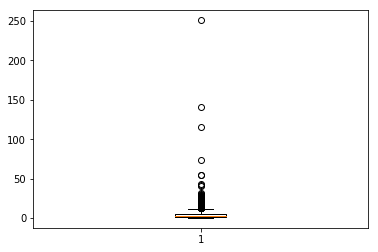

In [149]:
# Remove outliers
lead_score_ver1['TotalVisits'].describe([0,.25,.50, .75, .95, .99])
plt.boxplot(lead_score_ver1['TotalVisits'])
Q1 = lead_score_ver1['TotalVisits'].quantile(0.05)
Q3 = lead_score_ver1['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1

lead_score_ver1 = lead_score_ver1[(lead_score_ver1['TotalVisits'] >=  Q1 - 1.5 * IQR) & 
                  (lead_score_ver1['TotalVisits'] <=  Q3 + 1.5 * IQR)]
lead_score_ver1.shape


(8433, 12)

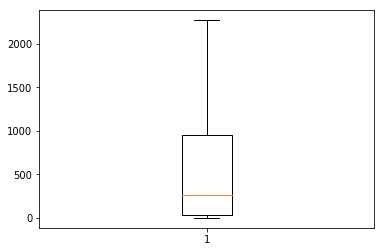

In [150]:
# Remove outliers
lead_score_ver1['Total Time Spent on Website'].describe([0,.25,.50, .75, .95, .99])
plt.boxplot(lead_score_ver1['Total Time Spent on Website'])
Q1 = lead_score_ver1['Total Time Spent on Website'].quantile(0.05)
Q3 = lead_score_ver1['Total Time Spent on Website'].quantile(0.95)
IQR = Q3 - Q1

lead_score_ver1 = lead_score_ver1[(lead_score_ver1['Total Time Spent on Website'] >=  Q1 - 1.5 * IQR) & 
                  (lead_score_ver1['Total Time Spent on Website'] <=  Q3 + 1.5 * IQR)]
lead_score_ver1.shape


(8430, 12)

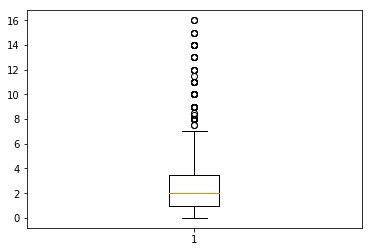

In [151]:
# Remove outliers
lead_score_ver1['Page Views Per Visit'].describe([0,.25,.50, .75, .95, .99])
plt.boxplot(lead_score_ver1['Page Views Per Visit'])
Q1 = lead_score_ver1['Page Views Per Visit'].quantile(0.05)
Q3 = lead_score_ver1['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1

lead_score_ver1 = lead_score_ver1[(lead_score_ver1['Page Views Per Visit'] >=  Q1 - 1.5 * IQR) & 
                  (lead_score_ver1['Page Views Per Visit'] <=  Q3 + 1.5 * IQR)]
lead_score_ver1.shape

In [152]:
#Find correlation between numeric variables
lead_score_ver1.corr()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
Converted,1.000000,0.022895,0.341291,-0.034030
TotalVisits,0.022895,1.000000,0.307895,0.678694
Total Time Spent on Website,0.341291,0.307895,1.000000,0.312007
Page Views Per Visit,-0.034030,0.678694,0.312007,1.000000


In [153]:
lead_score_ver1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Data Modelling

### Data Preparation

In [154]:
lead_score_ver1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,
660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,No,Modified
660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,No,Email Opened
660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,No,Modified
660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,No,Modified


In [155]:
# Convert categorical values in numeric values.
lead_score_ver2 = lead_score_ver1.copy()
binary_varList = ['Do Not Email', 'A free copy of Mastering The Interview']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})
    
lead_score_ver2[binary_varList] = lead_score_ver2[binary_varList].apply(binary_map)

lead_score_ver2.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,What matters most to you in choosing a course,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,
660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,Better Career Prospects,0,Modified
660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Unemployed,Better Career Prospects,0,Email Opened
660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Student,Better Career Prospects,1,Email Opened
660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Unemployed,Better Career Prospects,0,Modified
660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,Better Career Prospects,0,Modified


In [156]:
#Create a dummy variable for the categorical variable and dropping the first
dummy_df = pd.get_dummies(lead_score_ver2[['Lead Origin', 'Lead Source', 'Last Activity',
                                         'What is your current occupation',
                                         'What matters most to you in choosing a course', 
                                         'Last Notable Activity']], drop_first = True)

#Adding the result to the master dataframe
lead_score_ver2 = pd.concat([lead_score_ver2, dummy_df], axis = 1)
lead_score_ver2.shape

(8430, 72)

In [157]:
lead_score_ver3 = lead_score_ver2.copy()
lead_score_ver3.drop(['Lead Origin', 'Lead Source', 'Last Activity',
                      'What is your current occupation', 'What matters most to you in choosing a course', 
                      'Last Notable Activity', 'Do Not Email', 'A free copy of Mastering The Interview'], 
                     axis = 1, inplace = True)
lead_score_ver3.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660728,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [158]:
#Check for null values
lead_score_ver3.isnull().sum()

Converted                                                                  0
TotalVisits                                                                0
Total Time Spent on Website                                                0
Page Views Per Visit                                                       0
Lead Origin_Landing Page Submission                                        0
Lead Origin_Lead Add Form                                                  0
Lead Origin_Lead Import                                                    0
Lead Source_Direct Traffic                                                 0
Lead Source_Facebook                                                       0
Lead Source_Google                                                         0
Lead Source_Live Chat                                                      0
Lead Source_NC_EDM                                                         0
Lead Source_Olark Chat                                                     0

### Test-Train Split

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
# Putting feature variable to X
X = lead_score_ver3.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660728,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660727,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
660719,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
660681,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [161]:
# Putting response variable to y
y = lead_score_ver3['Converted']

y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

### Step 4: Test-Train Split

In [162]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [163]:
from sklearn.preprocessing import StandardScaler


In [164]:
scaler = StandardScaler()

numeric_col  = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
656265,0.169106,1.545229,0.763910,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
625185,-1.051189,-0.913577,-1.201660,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
584237,-1.051189,-0.913577,-1.201660,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
604244,0.779254,-0.853651,0.272518,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
599330,-0.135968,-0.550386,-0.464571,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [165]:
### Checking the Converted Rate
converted = (sum(lead_score_ver3['Converted'])/len(lead_score_ver3['Converted'].index))*100
converted

39.97627520759193

### Looking at Correlations

In [166]:
lead_score_ver3.corr()


,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Converted,1.000000,0.022895,0.341291,-0.034030,-0.084973,0.304127,-0.013573,-0.098904,-0.013573,0.025275,...,0.013347,-0.008889,0.044030,-0.255360,-0.058127,-0.030505,0.342642,0.040695,-0.017642,-0.008889
TotalVisits,0.022895,1.000000,0.307895,0.678694,0.385299,-0.271448,-0.059092,0.089419,-0.056718,0.151739,...,0.008349,-0.004848,0.033909,-0.132461,-0.038158,0.223150,-0.005915,0.011414,0.004951,0.014947
Total Time Spent on Website,0.341291,0.307895,1.000000,0.312007,0.273040,-0.210908,-0.055277,0.124542,-0.053895,0.196602,...,0.005104,-0.004278,0.022066,-0.115811,-0.034462,0.029097,0.117993,0.010780,-0.000748,-0.008197
Page Views Per Visit,-0.034030,0.678694,0.312007,1.000000,0.488013,-0.314458,-0.065143,0.108158,-0.061323,0.199840,...,0.002876,-0.002433,0.013465,-0.095343,-0.076149,0.023248,0.046253,0.022971,0.020932,0.001124
Lead Origin_Landing Page Submission,-0.084973,0.385299,0.273040,0.488013,1.000000,-0.323563,-0.070695,0.507509,-0.066731,0.068980,...,0.009360,0.009360,-0.000312,-0.071094,-0.107328,0.051671,0.035250,-0.001033,0.017740,-0.012675
Lead Origin_Lead Add Form,0.304127,-0.271448,-0.210908,-0.314458,-0.323563,1.000000,-0.016893,-0.180696,-0.016893,-0.167006,...,-0.003029,-0.003029,-0.011341,-0.070005,-0.021567,-0.015475,0.122593,0.006537,-0.007006,-0.003029
Lead Origin_Lead Import,-0.013573,-0.059092,-0.055277,-0.065143,-0.070695,-0.016893,1.000000,-0.039480,0.967623,-0.037880,...,-0.000662,-0.000662,-0.002478,-0.007579,-0.007866,-0.011240,-0.030189,-0.003631,-0.004350,-0.000662
Lead Source_Direct Traffic,-0.098904,0.089419,0.124542,0.108158,0.507509,-0.180696,-0.039480,1.000000,-0.039480,-0.449979,...,-0.007078,0.016761,-0.013752,-0.035170,-0.063755,0.056836,0.006210,-0.017036,0.004492,-0.007078
Lead Source_Facebook,-0.013573,-0.056718,-0.053895,-0.061323,-0.066731,-0.016893,0.967623,-0.039480,1.000000,-0.042067,...,-0.000662,-0.000662,-0.002478,-0.007579,-0.007866,-0.011240,-0.025641,-0.003631,-0.004350,-0.000662
Lead Source_Google,0.025275,0.151739,0.196602,0.199840,0.068980,-0.167006,-0.037880,-0.449979,-0.042067,1.000000,...,0.015730,-0.007542,0.027779,-0.002505,-0.021987,-0.006260,-0.005950,0.009694,0.000230,0.015730


### Model Building

In [167]:
import statsmodels.api as sm

In [168]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [169]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [170]:
rfe.support_

array([False,  True, False, False,  True, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False])

In [171]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 46),
 ('Lead Source_Direct Traffic', False, 18),
 ('Lead Source_Facebook', True, 1),
 ('Lead Source_Google', False, 21),
 ('Lead Source_Live Chat', False, 36),
 ('Lead Source_NC_EDM', False, 49),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Pay per Click Ads', False, 32),
 ('Lead Source_Press_Release', False, 38),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_WeLearn', False, 48),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 45),
 ('Lead Source_blog', False, 34),
 ('Lead Source_google', False, 19),
 ('Lead Source_testone', False, 33),
 ('Lead Source_welearnblog_Home', False, 39),
 

In [172]:
col = X_train.columns[rfe.support_]

In [173]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link C

In [174]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5901
Model:                            GLM   Df Residuals:                     5885
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2461.2
Date:                Tue, 27 Aug 2019   Deviance:                       4922.3
Time:                        00:47:14   Pearson chi2:                 5.71e+03
No. Iterations:                    23   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0293      0.055    -18.632      0.000      -1.138      -0.921
Total Time Spent on Website                              1.1127      0.041     26.936      0.000       1.032       1.194
Lead Origin_Lead Add Form                                3.5842      0.217     16.550      0.000       3.160       4.009
Lead Source_Facebook                                     1.0800      0.497      2.173      0.030       0.106       2.054
Lead Source_Olark Chat                                   1.3467      0.110     12.212      0.000       1.131       1.563
Lead Source_Welingak Website                            22.4654   1.33e+04      0.002      0.999    -2.6e+04     2.6e+04
Last Activity_Converted to Lead                         -1.1911      0.218     -5.453      0.000      -1.619      -0.763
Last Activity_Email Bounced                             -2.3552      0.469     -5.017      0.000      -3.275      -1.435
Last Activity_Had a Phone Conversation                   1.4390      0.978      1.472      0.141      -0.477       3.355
Last Activity_Olark Chat Conversation                   -1.3677      0.170     -8.044      0.000      -1.701      -1.034
What is your current occupation_Working Professional     2.6891      0.198     13.568      0.000       2.301       3.078
What matters most to you in choosing a course_Other     -1.2007      0.096    -12.449      0.000      -1.390      -1.012
Last Notable Activity_Email Bounced                      1.4697      0.650      2.262      0.024       0.196       2.743
Last Notable Activity_Had a Phone Conversation           1.7248      1.508      1.143      0.253      -1.232       4.681
Last Notable Activity_SMS Sent                           1.3045      0.082     15.831      0.000       1.143       1.466
Last Notable Activity_Unreachable                        2.0560      0.555      3.705      0.000       0.968       3.144
========================================================================================================================
"""

In [175]:
# Remove the column with high p-value and rebuild the model
col = col.drop('Lead Source_Welingak Website', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5901
Model:                            GLM   Df Residuals:                     5886
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2470.3
Date:                Tue, 27 Aug 2019   Deviance:                       4940.6
Time:                        00:47:14   Pearson chi2:                 5.87e+03
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0300      0.055    -18.644      0.000      -1.138      -0.922
Total Time Spent on Website                              1.1126      0.041     26.939      0.000       1.032       1.194
Lead Origin_Lead Add Form                                3.9321      0.213     18.489      0.000       3.515       4.349
Lead Source_Facebook                                     1.0814      0.497      2.177      0.029       0.108       2.055
Lead Source_Olark Chat                                   1.3453      0.110     12.203      0.000       1.129       1.561
Last Activity_Converted to Lead                         -1.1893      0.218     -5.447      0.000      -1.617      -0.761
Last Activity_Email Bounced                             -2.3532      0.469     -5.016      0.000      -3.273      -1.434
Last Activity_Had a Phone Conversation                   1.4268      0.983      1.451      0.147      -0.500       3.353
Last Activity_Olark Chat Conversation                   -1.3590      0.169     -8.031      0.000      -1.691      -1.027
What is your current occupation_Working Professional     2.6773      0.198     13.491      0.000       2.288       3.066
What matters most to you in choosing a course_Other     -1.2009      0.096    -12.452      0.000      -1.390      -1.012
Last Notable Activity_Email Bounced                      1.5221      0.640      2.380      0.017       0.268       2.776
Last Notable Activity_Had a Phone Conversation           1.7378      1.512      1.150      0.250      -1.225       4.701
Last Notable Activity_SMS Sent                           1.3063      0.082     15.861      0.000       1.145       1.468
Last Notable Activity_Unreachable                        2.0548      0.555      3.700      0.000       0.966       3.143
========================================================================================================================
"""

In [176]:
# Remove the column with high p-value and rebuild the model
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5901
Model:                            GLM   Df Residuals:                     5887
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2471.0
Date:                Tue, 27 Aug 2019   Deviance:                       4942.0
Time:                        00:47:14   Pearson chi2:                 5.87e+03
No. Iterations:                     6   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0299      0.055    -18.642      0.000      -1.138      -0.922
Total Time Spent on Website                              1.1125      0.041     26.942      0.000       1.032       1.193
Lead Origin_Lead Add Form                                3.9311      0.213     18.483      0.000       3.514       4.348
Lead Source_Facebook                                     1.0811      0.497      2.177      0.030       0.108       2.055
Lead Source_Olark Chat                                   1.3450      0.110     12.201      0.000       1.129       1.561
Last Activity_Converted to Lead                         -1.1893      0.218     -5.447      0.000      -1.617      -0.761
Last Activity_Email Bounced                             -2.3532      0.469     -5.016      0.000      -3.273      -1.434
Last Activity_Had a Phone Conversation                   2.2908      0.717      3.194      0.001       0.885       3.696
Last Activity_Olark Chat Conversation                   -1.3590      0.169     -8.031      0.000      -1.691      -1.027
What is your current occupation_Working Professional     2.6767      0.198     13.487      0.000       2.288       3.066
What matters most to you in choosing a course_Other     -1.2006      0.096    -12.449      0.000      -1.390      -1.012
Last Notable Activity_Email Bounced                      1.5221      0.640      2.380      0.017       0.268       2.776
Last Notable Activity_SMS Sent                           1.3063      0.082     15.861      0.000       1.145       1.468
Last Notable Activity_Unreachable                        2.0547      0.555      3.700      0.000       0.966       3.143
========================================================================================================================
"""

### Checking VIFs

In [177]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [178]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.51
7,Last Activity_Olark Chat Conversation,1.34
5,Last Activity_Email Bounced,1.30
10,Last Notable Activity_Email Bounced,1.26
0,Total Time Spent on Website,1.24
1,Lead Origin_Lead Add Form,1.20
11,Last Notable Activity_SMS Sent,1.18
9,What matters most to you in choosing a course_...,1.17
8,What is your current occupation_Working Profes...,1.14
4,Last Activity_Converted to Lead,1.02


## Model Evaluation

### Evalution on train data

In [179]:
# Getting the predicted values on the train set
y_train_pred = round(res.predict(X_train_sm) * 100, 0)
y_train_pred[:10]

Lead Number
656265    67.0
625185    96.0
584237    33.0
604244     4.0
599330    16.0
621671    61.0
610052    33.0
642165    21.0
584936     2.0
641495    38.0
dtype: float64

In [180]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([67., 96., 33.,  4., 16., 61., 33., 21.,  2., 38.])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [181]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Lead_Score,LeadID
0,1,67.0,656265
1,1,96.0,625185
2,0,33.0,584237
3,0,4.0,604244
4,0,16.0,599330


In [182]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)*10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(20)

,Converted,Lead_Score,LeadID,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0
0,1,67.0,656265,1,1,1,1,1,1,1,0,0,0
1,1,96.0,625185,1,1,1,1,1,1,1,1,1,1
2,0,33.0,584237,1,1,1,1,0,0,0,0,0,0
3,0,4.0,604244,1,0,0,0,0,0,0,0,0,0
4,0,16.0,599330,1,1,0,0,0,0,0,0,0,0
5,0,61.0,621671,1,1,1,1,1,1,1,0,0,0
6,1,33.0,610052,1,1,1,1,0,0,0,0,0,0
7,0,21.0,642165,1,1,1,0,0,0,0,0,0,0
8,0,2.0,584936,1,0,0,0,0,0,0,0,0,0
9,1,38.0,641495,1,1,1,1,0,0,0,0,0,0


In [183]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [x for x in range(0, 100, 10)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

    prob  accuracy     sensi     speci
0    0.0  0.403830  1.000000  0.004809
10  10.0  0.599898  0.980558  0.345120
20  20.0  0.751568  0.915046  0.642150
30  30.0  0.784274  0.877853  0.721641
40  40.0  0.802915  0.771767  0.823762
50  50.0  0.806135  0.696957  0.879208
60  60.0  0.801559  0.634827  0.913154
70  70.0  0.777326  0.522823  0.947666
80  80.0  0.750551  0.425190  0.968317
90  90.0  0.692256  0.248943  0.988967


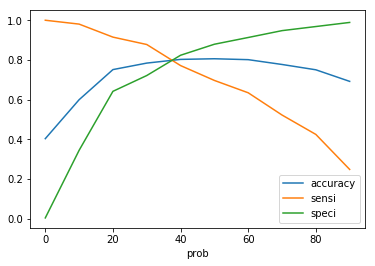

In [184]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [185]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score, recall_score

In [186]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Lead_Score)

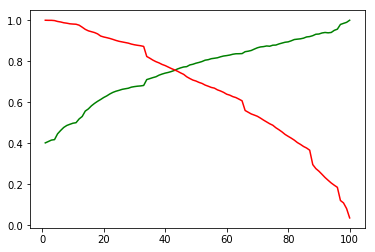

In [187]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [190]:
# Clearly as we aim at higher senstivity, 3% seems an optimal value
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score.map(lambda x: 1 if x >  32 else 0)

# Let's see the head
y_train_pred_final.head(20)

,Converted,Lead_Score,LeadID,0.0,10.0,20.0,30.0,40.0,50.0,60.0,70.0,80.0,90.0,predicted
0,1,67.0,656265,1,1,1,1,1,1,1,0,0,0,1
1,1,96.0,625185,1,1,1,1,1,1,1,1,1,1,1
2,0,33.0,584237,1,1,1,1,0,0,0,0,0,0,1
3,0,4.0,604244,1,0,0,0,0,0,0,0,0,0,0
4,0,16.0,599330,1,1,0,0,0,0,0,0,0,0,0
5,0,61.0,621671,1,1,1,1,1,1,1,0,0,0,1
6,1,33.0,610052,1,1,1,1,0,0,0,0,0,0,1
7,0,21.0,642165,1,1,1,0,0,0,0,0,0,0,0
8,0,2.0,584936,1,0,0,0,0,0,0,0,0,0,0
9,1,38.0,641495,1,1,1,1,0,0,0,0,0,0,1


In [191]:
from sklearn import metrics

In [192]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2573  962]
 [ 302 2064]]


In [193]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7857990171157431


In [194]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [195]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8723584108199492

In [196]:
# Let us calculate specificity
TN / float(TN+FP)

0.7278642149929279

In [197]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6820885657633841

In [198]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8723584108199492

In [199]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [200]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score, drop_intermediate = False )

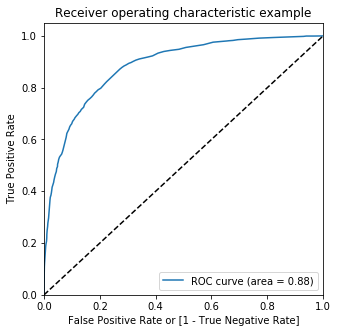

In [201]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score)

### Making predictions on the test set

In [202]:
X_test[numeric_col] = scaler.transform(X_test[numeric_col])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
Lead Number,,,,,,,,,,,,,,,,,,,,,
599367,0.779254,-0.405109,0.272518,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
638686,-0.135968,-0.270728,0.272518,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
637661,0.169106,-0.817332,-0.218875,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
627121,0.779254,-0.632104,1.746696,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
606982,-0.441041,2.042801,-0.218875,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [203]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Facebook,Lead Source_Olark Chat,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
Lead Number,,,,,,,,,,,,,
599367,-0.405109,0,0,0,0,0,0,0,0,0,0,0,0
638686,-0.270728,0,0,0,0,0,0,0,0,0,0,0,0
637661,-0.817332,0,0,0,0,0,0,0,0,1,0,0,0
627121,-0.632104,0,0,0,0,0,0,0,0,1,0,0,0
606982,2.042801,0,0,0,0,0,0,0,0,0,0,0,0


In [204]:
X_test_sm = sm.add_constant(X_test)

In [205]:
y_test_pred = res.predict(X_test_sm) * 100

In [206]:
y_test_pred[:10]

Lead Number
599367    18.534425
638686    20.898460
637661     4.149577
627121     5.051146
606982    77.602695
583002    82.015386
627970    60.806653
659600     4.552876
612160    79.821849
654022     3.787944
dtype: float64

In [207]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [208]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [209]:
# Putting 'Lead Number' to index
y_test_df['Lead Number'] = y_test_df.index

In [210]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [211]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [212]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score'})

In [213]:
y_pred_final['final_predicted'] = y_pred_final.Lead_Score.map(lambda x: 1 if x > 32 else 0)

In [214]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1097,  428],
       [ 128,  876]], dtype=int64)

In [215]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [216]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8725099601593626

In [217]:
# Let us calculate specificity
TN / float(TN+FP)

0.719344262295082